# Train a JointVAE model

### Get MNIST data
Build a simple JointVAE model on MNIST

In [1]:
from utils.dataloaders import get_mnist_dataloaders
train_loader, test_loader = get_mnist_dataloaders(batch_size=64)

### Define latent distribution of the model

In [2]:
# Latent distribution will be joint distribution of 10 gaussian normal distributions
# and one 10 dimensional Gumbel Softmax distribution
latent_spec = {'cont': 3,
               'disc': [10]}

### Build a model

In [3]:
from jointvae.models import VAE

model = VAE(latent_spec=latent_spec, img_size=(1, 32, 32))

In [4]:
print(model)

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=3, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=3, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=13, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTr

### Train the model

In [5]:
from torch import optim

# Build optimizer
optimizer = optim.Adam(model.parameters(), lr=5e-4)

In [6]:
from jointvae.training import Trainer

# Define the capacities
# Continuous channels
cont_capacity = [0.0, 5.0, 25000, 30.0]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0
# Discrete channels
disc_capacity = [0.0, 5.0, 25000, 30.0]  # Starting at a capacity of 0.0, increase this to 5.0
                                         # over 25000 iterations with a gamma of 30.0

# Build a trainer
trainer = Trainer(model, optimizer,
                  cont_capacity=cont_capacity,
                  disc_capacity=disc_capacity)

In [7]:
# Build a visualizer which will be passed to trainer to visualize progress during training
from viz.visualize import Visualizer

viz = Visualizer(model)

In [8]:
# Train model for 10 epochs
# Note this should really be a 100 epochs and trained on a GPU, but this is just to demo

trainer.train(train_loader, epochs=10)

0/60000	Loss: 719.487
3200/60000	Loss: 485.825
6400/60000	Loss: 293.755
9600/60000	Loss: 275.296
12800/60000	Loss: 273.618
16000/60000	Loss: 273.185
19200/60000	Loss: 270.825
22400/60000	Loss: 269.380
25600/60000	Loss: 267.023
28800/60000	Loss: 266.224
32000/60000	Loss: 267.505
35200/60000	Loss: 263.891
38400/60000	Loss: 264.627
41600/60000	Loss: 264.526
44800/60000	Loss: 262.786
48000/60000	Loss: 261.802
51200/60000	Loss: 262.945
54400/60000	Loss: 259.795
57600/60000	Loss: 258.897
Epoch: 1 Average loss: 279.88
0/60000	Loss: 264.217
3200/60000	Loss: 257.960
6400/60000	Loss: 257.246
9600/60000	Loss: 255.265
12800/60000	Loss: 256.752
16000/60000	Loss: 256.678
19200/60000	Loss: 254.731
22400/60000	Loss: 256.339
25600/60000	Loss: 253.076
28800/60000	Loss: 251.550
32000/60000	Loss: 253.075
35200/60000	Loss: 251.595
38400/60000	Loss: 250.474
41600/60000	Loss: 251.682
44800/60000	Loss: 249.317
48000/60000	Loss: 249.043
51200/60000	Loss: 248.515
54400/60000	Loss: 250.936
57600/60000	Loss: 247.

### Visualize

In [10]:
import matplotlib.pyplot as plt
# Plot samples
samples = viz.samples()
plt.imshow(samples.numpy()[0, :, :], cmap='gray')

AttributeError: 'NoneType' object has no attribute 'numpy'

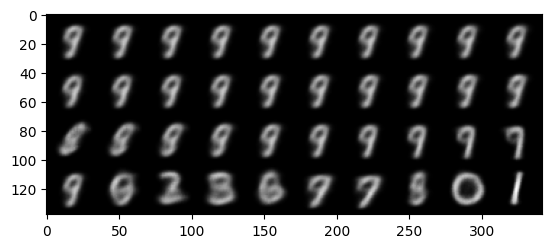

In [ ]:
# Plot all traversals
traversals = viz.all_latent_traversals(size=10)
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')